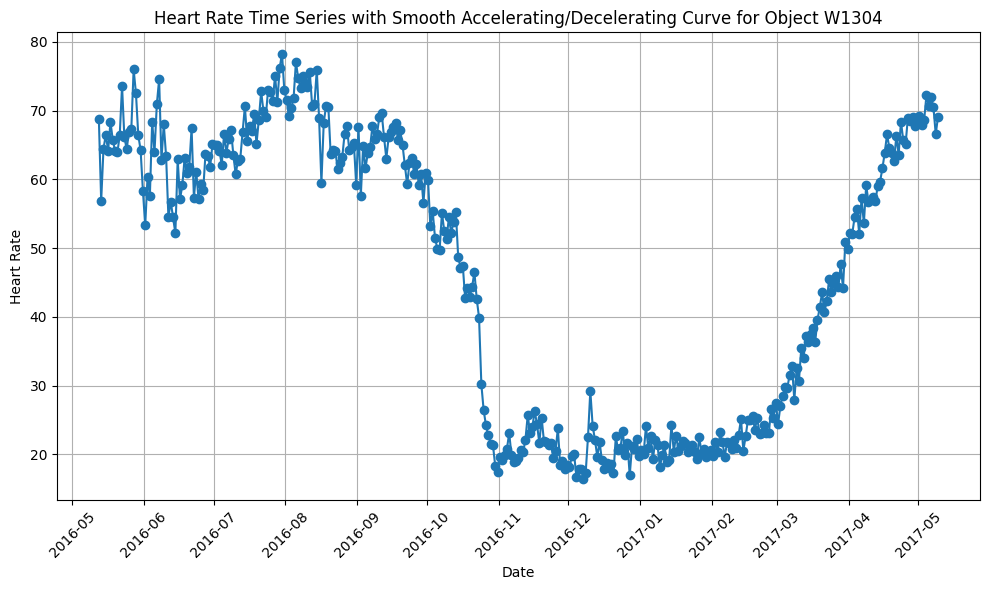

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('df_filtered_extended_final.csv')
df['GMT_date'] = pd.to_datetime(df['GMT_date'])

plt.figure(figsize=(10, 6))
plt.plot(df['GMT_date'], df['HeartRate'], marker='o', linestyle='-')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Time Series with Smooth Accelerating/Decelerating Curve for Object W1304')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


to generate seasonal data, I can fit sine function into this graph. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1756865/pdf/v053p00235.pdf


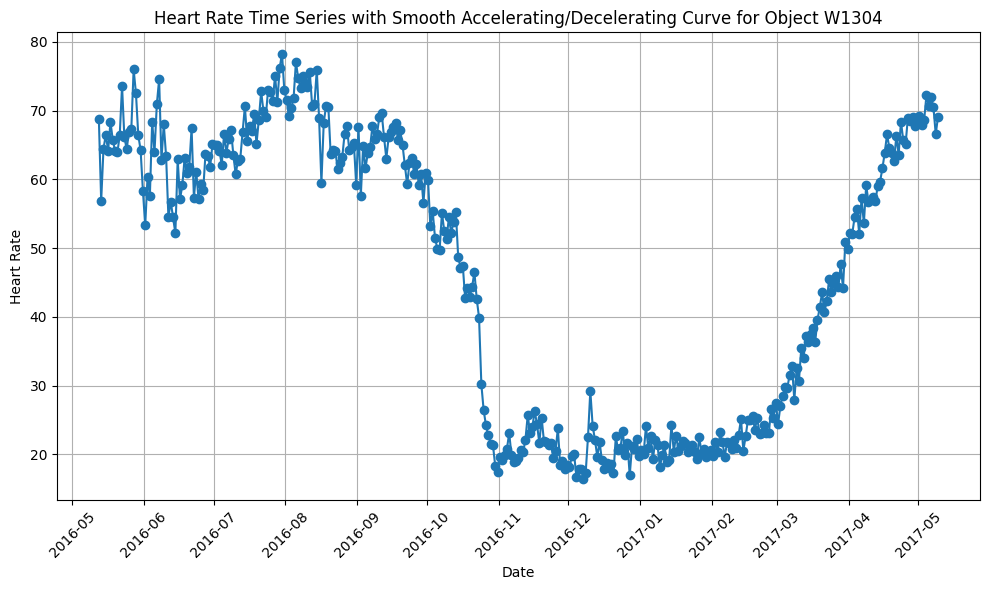

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(df['GMT_date'], df['HeartRate'], marker='o', linestyle='-')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Time Series with Smooth Accelerating/Decelerating Curve for Object W1304')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


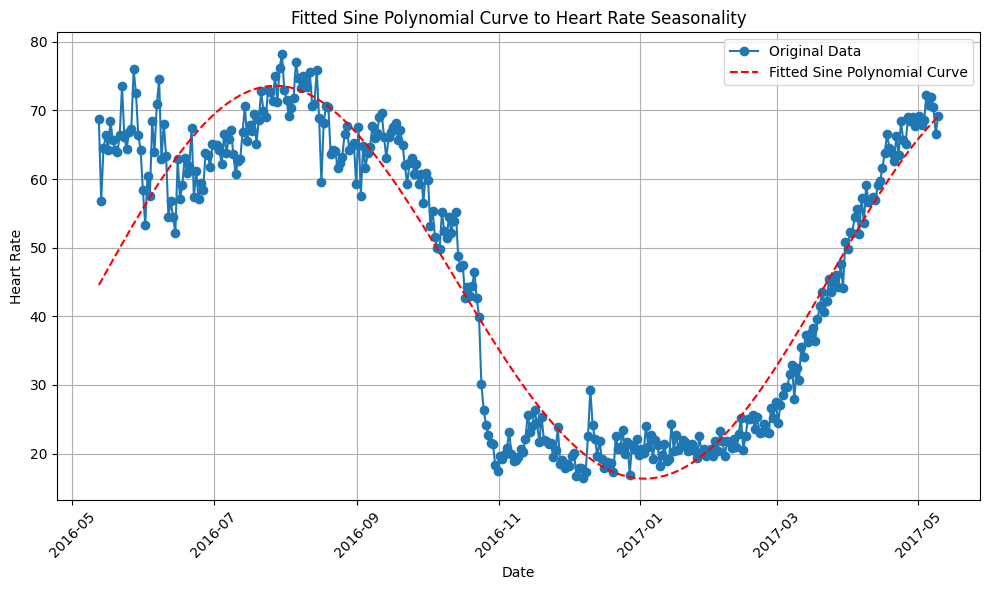

Fitted Sine Polynomial Function Parameters:
a1: 28.778299583010607
b1: 0.02012196080394532
a2: 0.6675135151034235
b2: 0.035852747514357436
Offset: 44.560159157873606


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


df['GMT_date'] = pd.to_datetime(df['GMT_date'])


def sine_polynomial(x, a1, b1, a2, b2, offset):
    return a1 * np.sin(b1 * x) + a2 * np.sin(b2 * x) + offset


df['DayOfYear'] = (df['GMT_date'] - df['GMT_date'].min()).dt.days


x_values = df['DayOfYear'].values
y_values = df['HeartRate'].values


initial_guess = [10, 2 * np.pi / 365, 5, 2 * np.pi / 180, np.mean(y_values)]


params, _ = curve_fit(sine_polynomial, x_values, y_values, p0=initial_guess)


fitted_curve = sine_polynomial(x_values, *params)


plt.figure(figsize=(10, 6))
plt.plot(df['GMT_date'], y_values, label='Original Data', marker='o')
plt.plot(df['GMT_date'], fitted_curve, label='Fitted Sine Polynomial Curve', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Fitted Sine Polynomial Curve to Heart Rate Seasonality')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


a1, b1, a2, b2, offset = params
print(f"Fitted Sine Polynomial Function Parameters:\na1: {a1}\nb1: {b1}\na2: {a2}\nb2: {b2}\nOffset: {offset}")


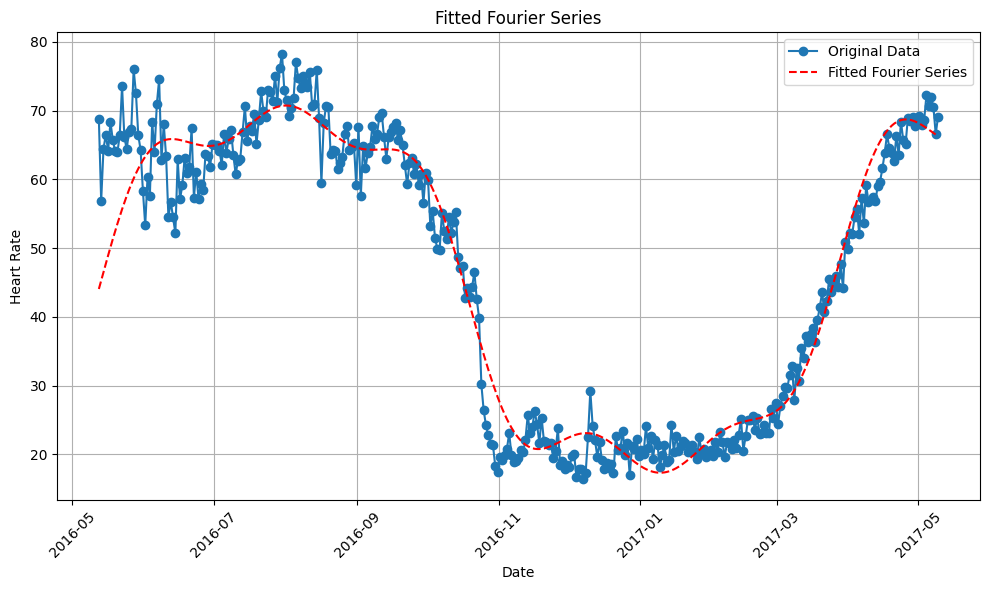

Fitted Fourier Series Parameters:
a1: 28.17287649113074
b1: 0.02003669500580529
a3: 5.18923630808906
b3: 0.01995954278078649
a5: 3.6784721809503367
b5: 0.019533690798802305
Offset: 44.05626363890536


In [4]:

def fourier_series_square_wave(x, a1, b1, a3, b3, a5, b5, offset):
    return (
        a1 * np.sin(b1 * x) +
        a3 * np.sin(3 * b3 * x) +
        a5 * np.sin(5 * b5 * x) +
        offset
    )


df['DayOfYear'] = (df['GMT_date'] - df['GMT_date'].min()).dt.days


x_values = df['DayOfYear'].values
y_values = df['HeartRate'].values


initial_guess = [10, 2 * np.pi / 365, 5, 2 * np.pi / 365, 3, 2 * np.pi / 365, np.mean(y_values)]


params, _ = curve_fit(fourier_series_square_wave, x_values, y_values, p0=initial_guess)


fitted_curve = fourier_series_square_wave(x_values, *params)


plt.figure(figsize=(10, 6))
plt.plot(df['GMT_date'], y_values, label='Original Data', marker='o')
plt.plot(df['GMT_date'], fitted_curve, label='Fitted Fourier Series', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Fitted Fourier Series')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


a1, b1, a3, b3, a5, b5, offset = params
print(f"Fitted Fourier Series Parameters:\na1: {a1}\nb1: {b1}\na3: {a3}\nb3: {b3}\na5: {a5}\nb5: {b5}\nOffset: {offset}")


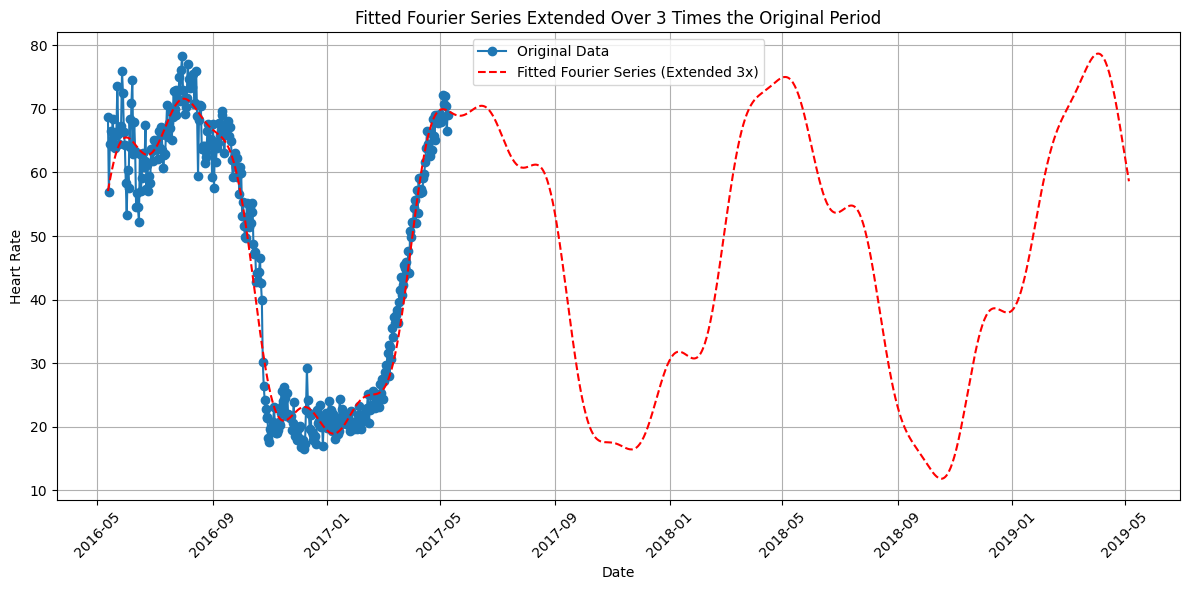

Fitted Fourier Series Parameters:
a1: 27.774376259631534
b1: 0.019362529766196755
c1: 5.085122303052377
a3: 1.8851450576772124
b3: 0.018194866566338088
c3: 5.450387735377812
a5: 2.4461221714735504
b5: 0.019056185281721802
c5: 2.0545074306536315
Offset: 44.48462936330236


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def fourier_series_sine_cosine(x, a1, b1, c1, a3, b3, c3, a5, b5, c5, offset):
    return (
        a1 * np.sin(b1 * x) +  
        c1 * np.cos(b1 * x) +  
        a3 * np.sin(3 * b3 * x) +
        c3 * np.cos(3 * b3 * x) +
        a5 * np.sin(5 * b5 * x) +
        c5 * np.cos(5 * b5 * x) +
        offset
    )


df['DayOfYear'] = (df['GMT_date'] - df['GMT_date'].min()).dt.days


x_values = df['DayOfYear'].values
y_values = df['HeartRate'].values


initial_guess = [10, 2 * np.pi / 365, 10, 5, 2 * np.pi / 365, 5, 3, 2 * np.pi / 365, 3, np.mean(y_values)]


params, _ = curve_fit(fourier_series_sine_cosine, x_values, y_values, p0=initial_guess)


fitted_curve = fourier_series_sine_cosine(x_values, *params)


x_extended = np.linspace(min(x_values), 3 * max(x_values), 3 * len(x_values))


fitted_curve_extended = fourier_series_sine_cosine(x_extended, *params)


extended_dates = pd.date_range(start=df['GMT_date'].min(), periods=len(x_extended), freq='D')


plt.figure(figsize=(12, 6))
plt.plot(df['GMT_date'], y_values, label='Original Data', marker='o')
plt.plot(extended_dates, fitted_curve_extended, label='Fitted Fourier Series (Extended 3x)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Fitted Fourier Series Extended Over 3 Times the Original Period')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


a1, b1, c1, a3, b3, c3, a5, b5, c5, offset = params
print(f"Fitted Fourier Series Parameters:\na1: {a1}\nb1: {b1}\nc1: {c1}\na3: {a3}\nb3: {b3}\nc3: {c3}\na5: {a5}\nb5: {b5}\nc5: {c5}\nOffset: {offset}")


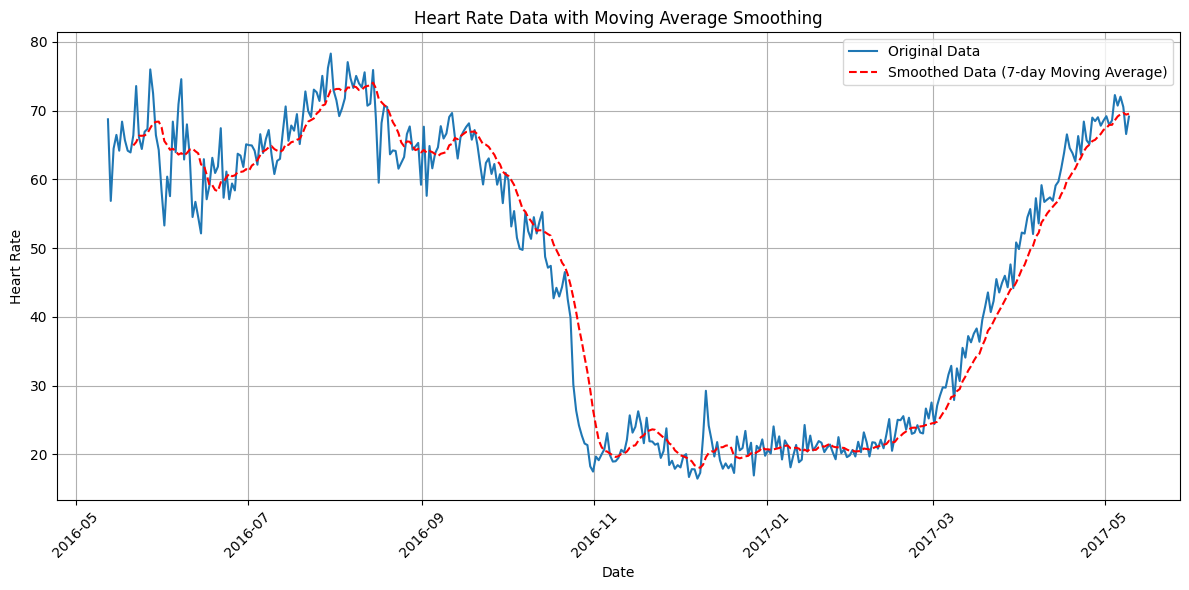

In [6]:

df['HeartRate_Smoothed'] = df['HeartRate'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['GMT_date'], df['HeartRate'], label='Original Data', linestyle='-')
plt.plot(df['GMT_date'], df['HeartRate_Smoothed'], label='Smoothed Data (7-day Moving Average)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Data with Moving Average Smoothing')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
class DayGenerator:
    def __init__(self, years_to_extend=1):
        
        self.df_original = pd.read_csv('df_filtered_extended_final.csv')
        self.df_original['GMT_date'] = pd.to_datetime(self.df_original['GMT_date'])
        
        
        self.df_original['HeartRate_Smoothed'] = self.df_original['HeartRate'].rolling(window=10).mean()
        
        
        self.df_extended = self.extend_df(self.df_original, years=years_to_extend)  
        
        
        self.current_index = len(self.df_original)  
        self.years_to_extend = years_to_extend  

    def extend_df(self, df, years=1):
        
        df = df.drop(columns=['Object_ID', 'Species'], errors='ignore')
        
        
        df2 = df.copy()
        df2['GMT_date'] = df2['GMT_date'] + pd.DateOffset(years=years)  
        
        
        df_extended = pd.concat([df, df2], ignore_index=True)
        
        
        df_extended.set_index('GMT_date', inplace=True)
        df_extended = df_extended.resample('D').mean().interpolate(method='linear')
        df_extended.reset_index(inplace=True)
        return df_extended

    def get_next_day(self):
        
        if self.current_index >= len(self.df_extended):
            self.df_extended = self.extend_df(self.df_extended, years=self.years_to_extend)
        
        
        next_day_data = self.df_extended.iloc[self.current_index]
        self.current_index += 1  
        return next_day_data





day_gen = DayGenerator(years_to_extend=1)


next_day = day_gen.get_next_day()
print(next_day)




GMT_date              2017-05-10 00:00:00
HeartRate                       68.987024
HeartRate_Smoothed              69.155494
Name: 363, dtype: object


In [12]:
print(day_gen.get_next_day())

GMT_date              2017-05-15 00:00:00
HeartRate                       66.461111
HeartRate_Smoothed              67.232668
Name: 368, dtype: object
